In [30]:
import pandas as pd

data = pd.read_csv('../data/dataframe_final.csv', index_col=0)
label = pd.read_csv('../data/label_final.csv', index_col=0)
data

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1963-01-01,0,173,861,3246,1,231,98,1819,905,719,4569
1963-01-01,0,254,245,2251,1,85,1271,0,786,504,858
1963-01-01,0,591,845,3404,1,144,934,380,414,904,6858
1963-01-01,0,372,501,3930,1,51,1582,2922,1156,595,4349
1963-01-01,0,610,791,3439,1,440,1173,2930,347,776,3377
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,834,346,668,1043,1,70,767,0,642,682,3100
2022-12-26,834,405,655,2675,0,46,249,1852,821,758,1270
2022-12-26,834,432,594,1716,1,662,1373,75,655,558,1652
2022-12-26,834,377,393,3764,1,595,2132,80,621,549,897


In [36]:
# split index's string(YYYY-mm-dd) into year, month, day
data['year'] = data.index.str.split('-').str[0].astype(int)
data['month'] = data.index.str.split('-').str[1].astype(int)
data['day'] = data.index.str.split('-').str[2].astype(int)

label['year'] = label.index.str.split('-').str[0].astype(int)
label['month'] = label.index.str.split('-').str[1].astype(int)
label['day'] = label.index.str.split('-').str[2].astype(int)

In [51]:
data

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year,month,day
1963-01-01,0,173,861,3246,1,231,98,1819,905,719,4569,1963,1,1
1963-01-01,0,254,245,2251,1,85,1271,0,786,504,858,1963,1,1
1963-01-01,0,591,845,3404,1,144,934,380,414,904,6858,1963,1,1
1963-01-01,0,372,501,3930,1,51,1582,2922,1156,595,4349,1963,1,1
1963-01-01,0,610,791,3439,1,440,1173,2930,347,776,3377,1963,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,834,346,668,1043,1,70,767,0,642,682,3100,2022,12,26
2022-12-26,834,405,655,2675,0,46,249,1852,821,758,1270,2022,12,26
2022-12-26,834,432,594,1716,1,662,1373,75,655,558,1652,2022,12,26
2022-12-26,834,377,393,3764,1,595,2132,80,621,549,897,2022,12,26


In [52]:
label

,0,year,month,day
1963-01-01,1,1963,1,1
1963-01-01,2,1963,1,1
1963-01-01,3,1963,1,1
1963-01-01,4,1963,1,1
1963-01-01,5,1963,1,1
...,...,...,...,...
2022-12-26,96,2022,12,26
2022-12-26,97,2022,12,26
2022-12-26,98,2022,12,26
2022-12-26,99,2022,12,26


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# show effect of each column on label
# for especially y year m month
# x-axis: column value
# y-axis: label value
# hue: year, month
# regression plot
# scatter plot
# show correlation
# for each 10 columns, 10 plots
features = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
def showCorrelationAt(year, month):
    # show effect of each column on label
    # for especially y year m month
    # x-axis: column value
    # y-axis: label value
    # hue: year, month
    # regression plot
    # scatter plot
    # show correlation
    # for each 10 columns, 10 plots
    data_year = data[data['year'] == year]
    data_month = data_year[data_year['month'] == month]
    label_year = label[label['year'] == year]
    label_month = label_year[label_year['month'] == month]
    
    dataForShow = data_month[features]
    std = StandardScaler()
    dataForShow = pd.DataFrame(std.fit_transform(dataForShow), columns=features, index=dataForShow.index)
    dataForShow['label'] = label_month['0']
    
    fig, axs = plt.subplots(2, 5, figsize=(20, 10))
    
    for i, feature in enumerate(features):
        sns.regplot(x=feature, y='label', data=dataForShow, ax=axs[i//5][i%5])
        axs[i//5][i%5].set_title(f'{feature} vs label')
        axs[i//5][i%5].set_xlabel(feature)
        axs[i//5][i%5].set_ylabel('label')
        axs[i//5][i%5].grid()
    plt.show()
    
        

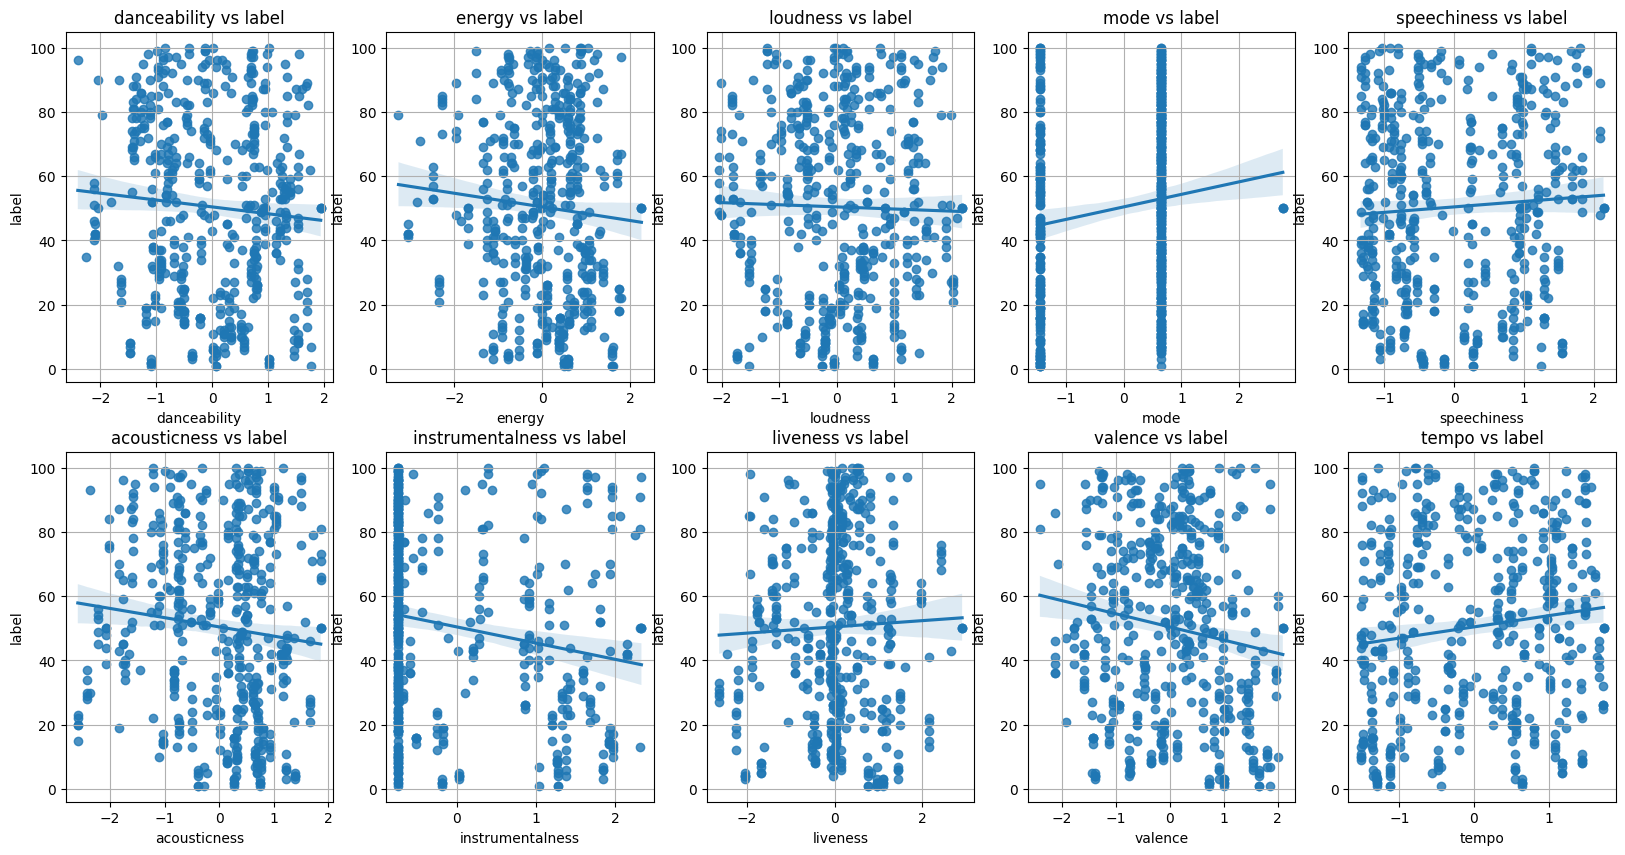

In [63]:
showCorrelationAt(2022, 8)